<a href="https://colab.research.google.com/github/Heart-n-Soul/AI-Crash-Course/blob/main/clarity_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import glob

In [4]:
sensor_data = pd.read_excel('/content/drive/MyDrive/clarity.xlsx')
print(sensor_data)

                     date         FEM    Clarity  Clarity_T  Clarity_RH  \
0     2023-11-14 08:44:00   19.731717  10.955000  30.180000   72.230000   
1     2023-11-14 08:59:00   17.100782  11.423333  30.533333   71.066667   
2     2023-11-14 09:14:00   16.353123  12.030000  31.395000   69.225000   
3     2023-11-14 09:29:00   16.940600  13.895000  32.045000   67.765000   
4     2023-11-14 09:44:00   18.025315  13.916667  31.983333   66.833333   
...                   ...         ...        ...        ...         ...   
16525 2024-12-23 16:14:00  110.106467  32.596667  34.146667   42.643333   
16526 2024-12-23 16:29:00  111.473247  33.636667  33.590000   44.643333   
16527 2024-12-23 16:44:00  110.183840  32.853333  33.030000   47.176667   
16528 2024-12-23 16:59:00  108.772247  31.743333  32.370000   48.716667   
16529 2024-12-23 17:14:00  108.418053  31.946667  31.700000   53.396667   

              RH       Temp  
0      97.046667  29.433333  
1      94.800000  29.730667  
2      91

In [5]:
sensor_data['date'] = pd.to_datetime(sensor_data['date'])

In [6]:
print(sensor_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16530 entries, 0 to 16529
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16530 non-null  datetime64[ns]
 1   FEM         16530 non-null  float64       
 2   Clarity     16530 non-null  float64       
 3   Clarity_T   16530 non-null  float64       
 4   Clarity_RH  16530 non-null  float64       
 5   RH          16530 non-null  float64       
 6   Temp        16530 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 904.1 KB
None


In [7]:
sensor_data.set_index('date', inplace=True)

In [8]:
print(sensor_data.describe())

                FEM       Clarity     Clarity_T    Clarity_RH            RH  \
count  16530.000000  16530.000000  16530.000000  16530.000000  16530.000000   
mean      37.981607     20.039797     31.813497     64.373619     82.463238   
std       48.460312     18.045783      3.461284     10.947689     12.903032   
min        1.629428      2.713333     23.240000     19.230000     25.707333   
25%       12.561435      9.040000     29.070000     57.643333     75.648167   
50%       19.377593     13.273333     31.815000     65.627500     84.313333   
75%       37.957956     24.056667     34.680000     73.065000     92.633333   
max      385.545220    194.233333     39.610000     83.800000     99.000000   

               Temp  
count  16530.000000  
mean      30.604157  
std        2.496497  
min       23.977333  
25%       28.719333  
50%       30.594333  
75%       32.577167  
max       66.038000  


<Axes: xlabel='date'>

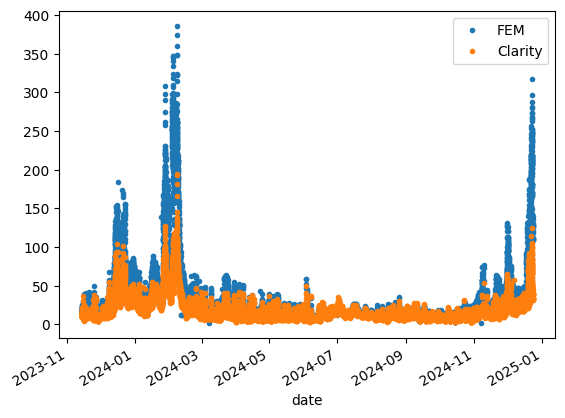

In [9]:
sensor_data.plot(y=['FEM', 'Clarity'],marker='.',linestyle='none')

<Axes: xlabel='date'>

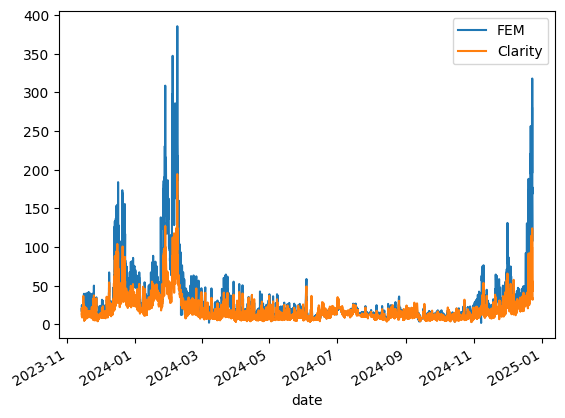

In [10]:
sensor_data.plot(y=['FEM', 'Clarity'])

In [11]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2

R2_raw = rsquared(sensor_data['FEM'],
                              sensor_data['Clarity'])
MAE_raw = mean_absolute_error(sensor_data['FEM'],
                              sensor_data['Clarity'])
print("R2 is ", R2_raw)
print("MAE is ", MAE_raw)

R2 is  0.8848998104073214
MAE is  18.115890461632254


In [23]:
train, test = train_test_split(sensor_data, test_size=0.2, random_state=70)

In [24]:
sensor_data.columns

Index(['FEM', 'Clarity', 'Clarity_T', 'Clarity_RH', 'RH', 'Temp', 'Clarity_c'], dtype='object')

In [25]:
# Create MLR model
model = LinearRegression()
model.fit(train[['Clarity', 'Clarity_T', 'Clarity_RH']], train['FEM'])

LinearRegression()

In [26]:
print(model)

LinearRegression()


In [27]:
# Apply model to test dataset
test['Clarity_c'] = model.predict(test[['Clarity', 'Clarity_T', 'Clarity_RH']])

# Apply to the entire dataset for plotting purposes
sensor_data['Clarity_c'] = model.predict(sensor_data[['Clarity', 'Clarity_T', 'Clarity_RH']])

In [31]:
# Calculate R2 and MAE for test data set only
R2_test = model.score(test[['Clarity', 'Clarity_T', 'Clarity_RH']], test['FEM'])
MAE_test = mean_absolute_error(test['FEM'], test['Clarity_c'])
RMSE_test = np.sqrt(mean_squared_error(test['FEM'], test['Clarity_c']))

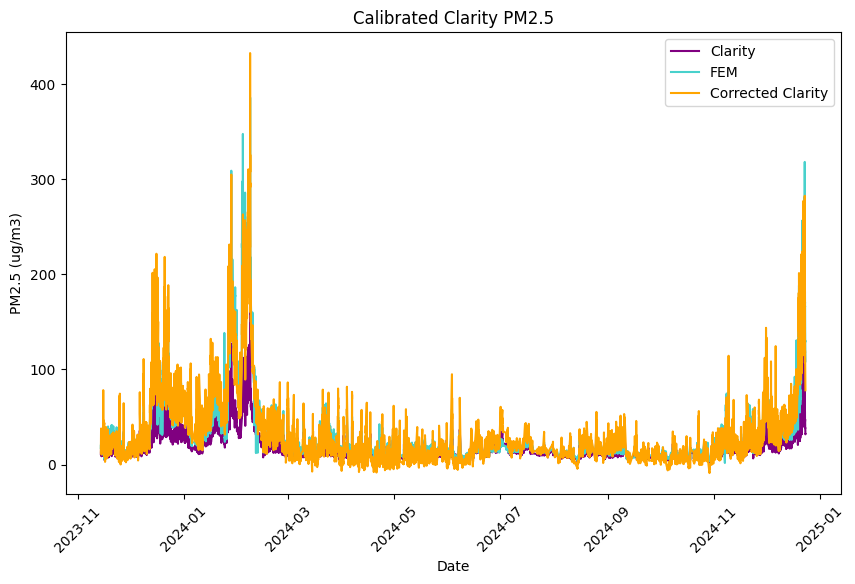

R^2 for test dataset: 0.9058648749436755
MAE for test dataset: 9.189109719968993
RMSE for test dataset: 15.478493212608813


In [32]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(sensor_data.index, sensor_data['Clarity'], label='Clarity', color='purple')
plt.plot(sensor_data.index, sensor_data['FEM'], label='FEM', color='mediumturquoise')
plt.plot(sensor_data.index, sensor_data['Clarity_c'], label='Corrected Clarity', color='orange')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.title('Calibrated Clarity PM2.5')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print model stats
print("R^2 for test dataset:", R2_test)
print("MAE for test dataset:", MAE_test)
print("RMSE for test dataset:", RMSE_test)

RMSE for test dataset: 14.294885419763412


In [19]:
#print model coefficients
print(model.coef_)

[ 2.19710954 -2.83525051 -1.28852774]


In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Define features and target
X = sensor_data[['Clarity', 'Clarity_T', 'Clarity_RH']]
y = sensor_data['FEM']

# Initialize LOOCV
loocv = LeaveOneOut()

# Lists to store predictions and true values
y_true = []
y_pred = []

# Perform LOOCV
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and store
    prediction = model.predict(X_test)[0]
    y_pred.append(prediction)
    y_true.append(y_test.values[0])

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate metrics
avg_mae = mean_absolute_error(y_true, y_pred)
avg_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
avg_r2 = r2_score(y_true, y_pred)

# Print results
print("Linear Regression Model with LOOCV on sensor_data")
print("-" * 45)
print(f"R² (on all LOOCV predictions): {avg_r2:.4f}")
print(f"MAE: {avg_mae:.4f}")
print(f"RMSE: {avg_rmse:.4f}")

# Train on full dataset to get final coefficients
full_model = LinearRegression()
full_model.fit(X, y)

print("\nCoefficients (trained on full dataset):")
for i, col in enumerate(X.columns):
    print(f"{col}: {full_model.coef_[i]:.4f}")
print(f"Intercept: {full_model.intercept_:.4f}")


Linear Regression Model with LOOCV on sensor_data
---------------------------------------------
R² (on all LOOCV predictions): 0.9057
MAE: 9.1016
RMSE: 14.8825

Coefficients (trained on full dataset):
Clarity: 2.1922
Clarity_T: -2.8131
Clarity_RH: -1.2906
Intercept: 166.6230


In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Define features and target
X = sensor_data[['Clarity', 'Clarity_T', 'Clarity_RH']]
y = sensor_data['FEM']

# Initialize K-Fold Cross-Validator
k = 10  # You can change this to 5, 10, etc.
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store predictions and true values
y_true = []
y_pred = []

# Perform K-Fold CV
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and store
    predictions = model.predict(X_test)
    y_pred.extend(predictions)
    y_true.extend(y_test.values)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate metrics
avg_mae = mean_absolute_error(y_true, y_pred)
avg_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
avg_r2 = r2_score(y_true, y_pred)

# Print results
print(f"Linear Regression Model with {k}-Fold Cross-Validation on sensor_data")
print("-" * 55)
print(f"R²: {avg_r2:.4f}")
print(f"MAE: {avg_mae:.4f}")
print(f"RMSE: {avg_rmse:.4f}")

# Train on full dataset to get final coefficients
full_model = LinearRegression()
full_model.fit(X, y)

print("\nCoefficients (trained on full dataset):")
for i, col in enumerate(X.columns):
    print(f"{col}: {full_model.coef_[i]:.4f}")
print(f"Intercept: {full_model.intercept_:.4f}")


Linear Regression Model with 10-Fold Cross-Validation on sensor_data
-------------------------------------------------------
R²: 0.9057
MAE: 9.1019
RMSE: 14.8847

Coefficients (trained on full dataset):
Clarity: 2.1922
Clarity_T: -2.8131
Clarity_RH: -1.2906
Intercept: 166.6230


In [27]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Define features and target
X = sensor_data[['Clarity', 'Clarity_T', 'Clarity_RH']]
y = sensor_data['FEM']

# Initialize Repeated K-Fold Cross-Validator
k = 10           # number of folds
n_repeats = 5    # number of repetitions
rkf = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=42)

# Lists to store predictions and true values
y_true = []
y_pred = []

# Perform Repeated K-Fold CV
for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and store
    predictions = model.predict(X_test)
    y_pred.extend(predictions)
    y_true.extend(y_test.values)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate metrics
avg_mae = mean_absolute_error(y_true, y_pred)
avg_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
avg_r2 = r2_score(y_true, y_pred)

# Print results
print(f"Linear Regression Model with {k}-Fold Repeated {n_repeats} Times")
print("-" * 60)
print(f"R²: {avg_r2:.4f}")
print(f"MAE: {avg_mae:.4f}")
print(f"RMSE: {avg_rmse:.4f}")

# Train on full dataset to get final coefficients
full_model = LinearRegression()
full_model.fit(X, y)

print("\nCoefficients (trained on full dataset):")
for i, col in enumerate(X.columns):
    print(f"{col}: {full_model.coef_[i]:.4f}")
print(f"Intercept: {full_model.intercept_:.4f}")


Linear Regression Model with 10-Fold Repeated 5 Times
------------------------------------------------------------
R²: 0.9057
MAE: 9.1022
RMSE: 14.8830

Coefficients (trained on full dataset):
Clarity: 2.1922
Clarity_T: -2.8131
Clarity_RH: -1.2906
Intercept: 166.6230
